In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
DATADIR = "../data/"

In [106]:
f"{DATADIR}police_kill_2015.csv"

'../data/police_kill_2015.csv'

In [107]:
data_2015 = pd.read_csv('../data/police_kill_2015.csv', encoding="cp1252")
data_2016 = pd.read_csv('../data/police_kill_2016.csv', encoding="ISO-8859–1")

In [108]:
killed = pd.concat([data_2015, data_2016])
killed.head()

uid               name age gender           raceethnicity    armed  \
0    2    Matthew Ajibade  22   Male                   Black       No   
1    4       Lewis Lembke  47   Male                   White  Firearm   
2    5  Michael Kocher Jr  19   Male                   White       No   
3    6      John Quintero  23   Male         Hispanic/Latino       No   
4    7        Tim Elliott  53   Male  Asian/Pacific Islander  Firearm   

     month  day  year         streetaddress       city state   latitude  \
0  January    1  2015  1050 Carl Griffin Dr   Savannah    GA  32.066691   
1  January    2  2015  4505 SW Masters Loop      Aloha    OR  45.487473   
2  January    3  2015    2600 Kaumualii Hwy  Kaumakani    HI  21.933347   
3  January    3  2015  500 North Oliver Ave    Wichita    KS  37.693797   
4  January    2  2015  600 E Island Lake Dr    Shelton    WA  47.246534   

    longitude     classification                lawenforcementagency  
0  -81.167881   Death in custody     Chatham County Sheriff's Office  
1 -122.891698            Gunshot  Washington County Sheriff's Office  
2 -159.641972  Struck by vehicle             Kauai Police Department  
3  -97.280549            Gunshot           Wichita Police Department  
4 -123.119497            Gunshot       Mason County Sheriff's Office

In [109]:
killed.shape

(2226, 16)

In [110]:
killed.describe()

uid          day         year     latitude    longitude
count  2.226000e+03  2226.000000  2226.000000  2156.000000  2156.000000
mean   1.622686e+06    15.740341  2015.485175    36.591295   -96.858648
std    3.905932e+06     8.681581     0.499892     5.289955    16.998437
min    2.000000e+00     1.000000  2015.000000    19.085159  -159.641972
25%    5.692500e+02     8.000000  2015.000000    33.469147  -112.207694
50%    1.143500e+03    16.000000  2015.000000    36.109137   -93.698624
75%    2.016528e+06    23.000000  2016.000000    39.966326   -82.591597
max    2.016109e+07    31.000000  2016.000000    71.301250   -68.014343

In [111]:
killed.dtypes

uid                       int64
name                     object
age                      object
gender                   object
raceethnicity            object
armed                    object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
classification           object
lawenforcementagency     object
dtype: object

In [112]:
# Simplified column names
killed = killed.rename(columns={"raceethnicity": "race", "streetaddress": "address", "lawenforcementagency": "agency"})

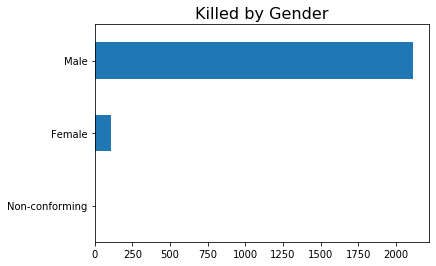

In [113]:
ax = killed.loc[:, "gender"].value_counts().sort_values().plot.barh()
ax.set_title("Killed by Gender", fontsize=16);

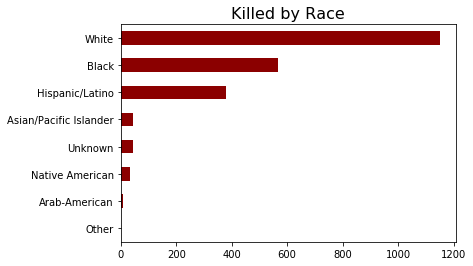

In [114]:
ax = killed.loc[:, "race"].value_counts().sort_values().plot.barh(color="darkred")
ax.set_title("Killed by Race", fontsize=16);

In [198]:
killed.loc[:, "race"].value_counts(normalize=True)

White                     0.516622
Black                     0.255166
Hispanic/Latino           0.169811
Asian/Pacific Islander    0.020216
Unknown                   0.019317
Native American           0.015274
Arab-American             0.003145
Other                     0.000449
Name: race, dtype: float64

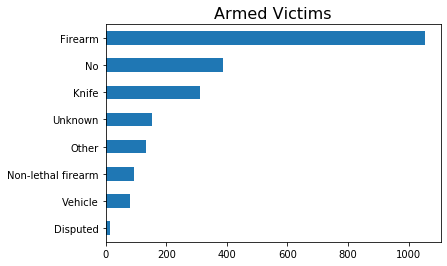

In [115]:
ax = killed.loc[:, "armed"].value_counts().sort_values().plot.barh()
ax.set_title("Armed Victims", fontsize=16);

In [131]:
black = killed.loc[killed.loc[:, "race"] == "Black", :]
white = killed.loc[killed.loc[:, "race"] == "White", :]
hispanic = killed.loc[killed.loc[:, "race"] == "Hispanic/Latino", :]

In [129]:
black.loc[:, "armed"].value_counts()

Firearm               279
No                    119
Knife                  57
Unknown                30
Vehicle                26
Other                  23
Non-lethal firearm     22
Disputed               12
Name: armed, dtype: int64

In [130]:
white.loc[:, "armed"].value_counts()

Firearm               560
No                    190
Knife                 154
Unknown                83
Other                  67
Non-lethal firearm     57
Vehicle                37
Disputed                2
Name: armed, dtype: int64

In [132]:
hispanic.loc[:, "armed"].value_counts()

Firearm               161
No                     65
Knife                  65
Unknown                33
Other                  31
Non-lethal firearm     12
Vehicle                10
Disputed                1
Name: armed, dtype: int64

In [143]:
killed.loc[killed.loc[:, "city"] == "Baltimore", :]

uid             name age gender   race               armed  \
64          67   Darin Hutchins  26   Male  Black               Knife   
412        421     Freddie Gray  25   Male  Black                  No   
981       1007      Ryan Martin  32   Male  Black             Firearm   
261    2016265  Matthew Wood Jr  43   Male  Black             Firearm   
262    2016266   Kimani Johnson  18   Male  Black             Firearm   
310    2016314    Robert Howard  44   Male  Black  Non-lethal firearm   
586    2016592    Dayten Harper  33   Male  Black             Firearm   
1025  20161034    Lavar Douglas  18   Male  Black             Firearm   

         month  day  year                   address       city state  \
64     January   24  2015           1900 McHenry St  Baltimore    MD   
412      April   12  2015  Mount St and Presbury St  Baltimore    MD   
981   November   11  2015          3700 Oakmont Ave  Baltimore    MD   
261      March   31  2016          400 E Lanvale St  Baltimore    MD   
262      March   31  2016          400 E Lanvale St  Baltimore    MD   
310      April   15  2016       1400 W Baltimore St  Baltimore    MD   
586       July   14  2016        2300 Winchester St  Baltimore    MD   
1025  December   13  2016          2500 W North Ave  Baltimore    MD   

       latitude  longitude    classification                          agency  
64    39.284467 -76.646863           Gunshot     Baltimore Police Department  
412   39.307973 -76.644875  Death in custody     Baltimore Police Department  
981   39.343138 -76.677457           Gunshot     Baltimore Police Department  
261   39.309054 -76.610476           Gunshot     Baltimore Police Department  
262   39.309054 -76.610476           Gunshot     Baltimore Police Department  
310   39.288679 -76.639768           Gunshot     Baltimore Police Department  
586   39.301760 -76.653627           Gunshot     Baltimore Police Department  
1025  39.310026 -76.658755           Gunshot  Coppin State Police Department

****
### Arrests Data

Dataset contains arrest information for the city of Baltimore.

In [135]:
arrests = pd.read_csv(f"{DATADIR}balitimore_police_arrests.csv")
arrests.head()

Arrest   Age Sex Race  ArrestDate ArrestTime    ArrestLocation  \
0  16160529.0  54.0   M    B  11/12/2016      22:35   3500 PELHAM AVE   
1  16160490.0  22.0   M    B  11/12/2016      21:49  300 S LOUDON AVE   
2  16160487.0  31.0   M    B  11/12/2016      21:40               NaN   
3  16160485.0  31.0   M    B  11/12/2016      20:30               NaN   
4  16160481.0  33.0   M    B  11/12/2016      19:45               NaN   

    IncidentOffense  IncidentLocation  Charge          ChargeDescription  \
0  4ECOMMON ASSAULT   3500 PELHAM AVE  1 1415             COMMON ASSAULT   
1   Unknown Offense  300 S LOUDON AVE  4 3550                 POSSESSION   
2   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
3   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
4   Unknown Offense               NaN  2 0480  MOTOR VEH/UNLAWFUL TAKING   

       District   Post   Neighborhood                       Location 1  
0  Northeastern  432.0  Belair-Edison  (39.3208685519, -76.5652449141)  
1  Southwestern  833.0      Irvington  (39.2811486601, -76.6821278085)  
2           NaN    NaN            NaN                              NaN  
3           NaN    NaN            NaN                              NaN  
4           NaN    NaN            NaN                              NaN

In [147]:
arrests.loc[:, "ArrestDate"] = pd.to_datetime(arrests.loc[:, "ArrestDate"])

In [162]:
def get_year(date):
    return date.year
    
arrests.loc[:, "ArrestYear"] = arrests.loc[:, "ArrestDate"].apply(get_year)
arrests.head()

Arrest   Age Sex Race ArrestDate ArrestTime    ArrestLocation  \
0  16160529.0  54.0   M    B 2016-11-12      22:35   3500 PELHAM AVE   
1  16160490.0  22.0   M    B 2016-11-12      21:49  300 S LOUDON AVE   
2  16160487.0  31.0   M    B 2016-11-12      21:40               NaN   
3  16160485.0  31.0   M    B 2016-11-12      20:30               NaN   
4  16160481.0  33.0   M    B 2016-11-12      19:45               NaN   

    IncidentOffense  IncidentLocation  Charge          ChargeDescription  \
0  4ECOMMON ASSAULT   3500 PELHAM AVE  1 1415             COMMON ASSAULT   
1   Unknown Offense  300 S LOUDON AVE  4 3550                 POSSESSION   
2   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
3   Unknown Offense               NaN  1 0077          FAILURE TO APPEAR   
4   Unknown Offense               NaN  2 0480  MOTOR VEH/UNLAWFUL TAKING   

       District   Post   Neighborhood                       Location 1  \
0  Northeastern  432.0  Belair-Edison  (39.3208685519, -76.5652449141)   
1  Southwestern  833.0      Irvington  (39.2811486601, -76.6821278085)   
2           NaN    NaN            NaN                              NaN   
3           NaN    NaN            NaN                              NaN   
4           NaN    NaN            NaN                              NaN   

   ArrestYear  
0        2016  
1        2016  
2        2016  
3        2016  
4        2016

In [202]:
# Selecting only data from 2015 and 2016
arrests = arrests.loc[arrests.loc[:, "ArrestYear"].isin([2015, 2016]), :]

In [201]:
arrests.loc[:, "Race"].value_counts(normalize=True)

B    0.817141
W    0.155431
U    0.020838
I    0.003918
A    0.002673
Name: Race, dtype: float64